<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/notebooks/2021_0331onomatopea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Onomatopea project with Dr. kondo
- date: 2021-0331
- file: 2021-0331onematopea.ipynb



In [1]:
!pwd

/content


In [1]:
# word2vec データの読み込み
# ファイルの所在に応じて変更してください
w2v_base = '/Users/asakawa/study/2016wikipedia/'
w2v_file = '2017Jul_jawiki-wakati_neologd_hid200_win20_neg20_cbow.bin.gz'

In [2]:
import os
import sys
import numpy as np
np.set_printoptions(precision=2)  # numpy の表示桁数設定

import json
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# word2vec でーた処理のため gensim を使う
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
from scipy import stats

import tqdm
import termcolor

# Colab では以下の 2 行の行頭の # を削除してから実行してください
!pip install jaconv
!pip install japanize_matplotlib
import jaconv  # ひらがなカタカナ変換用 `pip install jaconv` してください
import japanize_matplotlib  # matplotlib の日本語表示

# 2021/Jan 近藤先生からいただいたオノマトペ辞典のデータ
#ひとつ下の '日本語オノマトペ辞典4500より.xls' は著作権の問題があり，公にできません。
# そのため Google Colab での解法，ローカルファイルよりアップロードする
from google.colab import files
uploaded = files.upload()  # ここで `日本語オノマトペ辞典4500より.xls` を指定してアップロードする
#ccap_base = '/Users/asakawa/study/2021ccap/notebooks'
ccap_base = '.'
#onomatopea_excel = '日本語オノマトペ辞典4500より.xlsx'
onomatopea_excel = '2021-0325日本語オノマトペ辞典4500より.xls'
onmtp2761 = pd.read_excel(os.path.join(ccap_base, onomatopea_excel), sheet_name='2761語')

In [3]:
# word2vec データの読み込み
# ローカルディスクから読み込むようになっています。colab でお使いの場合には適宜変更してください
# word2vec の訓練済モデルを入手
#!wget http://www.cis.twcu.ac.jp/~asakawa/2017jpa/2017Jul_jawiki-wakati_neologd_hid200_win20_neg20_cbow.bin.gz
#!wget http://www.cis.twcu.ac.jp/~asakawa/2017jpa/2017Jul_jawiki-wakati_neologd_hid200_win20_neg20_sgns.bin.gz
#!wget http://www.cis.twcu.ac.jp/~asakawa/2017jpa/2017Jul_jawiki-wakati_neologd_hid300_win20_neg20_sgns.bin.gz
#!wget http://www.cis.twcu.ac.jp/~asakawa/2017jpa/2017Jul_jawiki-wakati_neologd_hid200_win20_neg20_cbow.bin.gz

# 訓練済 word2vec，訓練データは wikipedia 全文  読み込みに時間がかかります
#w2v_base = '/Users/asakawa/study/2016wikipedia/'
w2v_base = '.'
w2v_file = '2017Jul_jawiki-wakati_neologd_hid200_win20_neg20_cbow.bin.gz'
#w2v_file = '2017Jul_jawiki-wakati_neologd_hid200_win20_neg10_cbow.bin.gz'
#w2v_file = '2017Jul_jawiki-wakati_neologd_hid200_win20_neg20_sgns.bin.gz'
#w2v_file = '2017Jul_jawiki-wakati_neologd_hid200_win20_neg10_sgns.bin.gz'
w2v_file = os.path.join(w2v_base, w2v_file)
w2v = KeyedVectors.load_word2vec_format(w2v_file, 
                                                encoding='utf-8', 
                                                unicode_errors='replace',
                                                binary=True) 


In [4]:
onomatopea = list(set(sorted(onmtp2761['オノマトペ'])))

print('# オノマトペのうち，word2vec に登録があるかどうかを調査')
kana_entries, kata_entries = [], []
count = 0
for word in onomatopea:
    count += 1
    if word in w2v.vocab:
        kana_entries.append(word)

    kata_w = jaconv.hira2kata(word)
    if kata_w in w2v.vocab:
        kata_entries.append(kata_w)
        
entries = kana_entries + kata_entries

#print(len(kana_entries), len(kata_entries), len(onomatopea), count)
print('There are ', len(entries), ' in ', len(onomatopea), ' onomatopea words in word2vec from jawikipedia')
print('総数がオノマトペデータより多いのは，平仮名表記とカタカナ表記と両者で wikipedia に登録があった場合に重複してカウントしているからです。')
print('カタカナ オノマトペ総数:', len(kata_entries))
print('ひらがな オノマトペ総数:', len(kana_entries))


# オノマトペのうち，word2vec に登録があるかどうかを調査
There are  1832  in  1741  onomatopea words in word2vec from jawikipedia
総数がオノマトペデータより多いのは，平仮名表記とカタカナ表記と両者で wikipedia に登録があった場合に重複してカウントしているからです。
カタカナ オノマトペ総数: 936
ひらがな オノマトペ総数: 896


In [5]:
test_n = 10
print('確認用 {} 個のオノマトペをランダムサンプリングして表示。実行毎に結果が異なります:'.format(test_n))
for _ in range(test_n):
    word = np.random.choice(entries)
    print('単語:{0}, ID:{1}'.format(termcolor.colored(word,'green'), entries.index(word)))

確認用 10 個のオノマトペをランダムサンプリングして表示。実行毎に結果が異なります:
単語:ビーン, ID:1375
単語:ザーザー, ID:1135
単語:パクパク, ID:1124
単語:しゃりしゃり, ID:795
単語:しゅっ, ID:637
単語:クイクイ, ID:1775
単語:ジージー, ID:1774
単語:ゾロゾロ, ID:1658
単語:スコン, ID:1034
単語:きょとん, ID:483


In [6]:
def P_orth(X):
    """Return Orthogonal Projection and its complement matrices of X
    直交射影行列とその補空間への射影行列を返す。
    X を (n行 m列)としたとき， (m,m) 型の逆行列を算出。(n,n)型ではないことに注意
    
    引数
    x: np.array (n,m)
        入力行列
    戻り値
    P: np.array (m,m)
        射影行列
    Q: np.arrary(m,m)
        直交補空間への射影行列
    """
    XT = X.T
    X_XT = np.dot(X, XT)
    iXXT = np.linalg.inv(X_XT)
    XT_iXXT = np.dot(XT,iXXT) # np.dot(XT, iXXT)
    XT_iXXT_X = np.dot(XT_iXXT, X)
    P = XT_iXXT_X
    I = np.eye((P.shape[0]))
    Q = I - P
    return P, Q, I, X

#x1 = np.array([w2v['うさぎ']])
#x2 = np.array([w2v['きつね']])
#X = np.concatenate((x1,x2),axis=0)
#P, Q = OPM(X)
#x = np.dot(P, X.T)
#y = np.dot(Q, X.T)
#np.mean((X.T - (x+y))**2)
#print(X[:5,:5])
#print((x+y)[:5,:5].T)
#P, Q = OPM()

def w2vMat(w2v=w2v, wordlist=['イヌ','ネコ', 'トラ', 'ライオン']):
    """len(wordlist)行，word2vec 次元数 列を持つ行列 を返す"""

    if w2v == None:
        assert('Set a `gensim.models.keyedvectors.Word2VecKeyedVectors` as an w2v argument')
        
    # 行列の確保
    X = np.zeros((len(set(wordlist)), w2v.vector_size), dtype=np.float)
        
    # 各行に word2vec ベクトルをコピー
    for i, word in enumerate(set(wordlist)):
        X[i] = np.copy(w2v[word])
            
    return X


In [7]:
class w2v_projection():
    """射影行列の作成
    オノマトペ空間への射影行列の作成し， その射影行列によって変換されたベクトルを用いて最近隣語を
    gensim の関数を使って表示
    
    引数:
    w2v: gensim.KeyedVectors()
        訓練済 word2vec データ
    wordlist: list
        射影空間を作成する語彙リスト
    """
    def __init__(self, w2v=w2v, wordlist=entries,topn=5):
        self.topn=10
        self.entries = wordlist
        self.w2v = w2v
        
        self.X = w2vMat(w2v=self.w2v, wordlist=self.entries)
        self.P, self.Q, self.I, _ = P_orth(self.X)
        self.CovP = np.dot(self.X.T, self.X)    # shape(w2v_dim, w2v_dim)
        self.CorP = np.corrcoef(self.X.T)       # shape(w2v_dim, w2v_dim)

        
    def printProj(self, targets=['電車','ネコ','東京'], topn=5, colored=True):
        """targets で指定された単語を射影したベクトルから得られる最近接語の印字"""
        for target in targets:
            if not target in self.w2v:
                continue
            x = np.array(self.w2v[target])
            Px = np.dot(self.P, x)
            target = termcolor.colored(target,'green') if colored else target
            print(target, ':--> ', end="")
            for word in self.w2v.similar_by_vector(Px,topn=topn):
                word_ = word[0]
                word_ = termcolor.colored(word_, 'red') if colored else word_
                print(word_, end=" ")
            print()
            Qx = np.dot(self.Q, x)
            print('\t 直交補空間への射影:--> ', end='')
            for word in w2v.similar_by_vector(Qx,topn=topn):
                word_ = word[0]
                word_ = termcolor.colored(word_,'red') if colored else word_
                print(word_, end=" ")
            print()
            
            
    def getProjWord(self, targets=['電車','ネコ','東京'], topn=5, Proj=None):
        """targets で指定された単語を射影したベクトルから得られる最近接語リストを返す"""
        if Proj == 'Prj':
            P = self.P
        if Proj == 'Cov':
            P = self.CovP
        elif Proj == 'Cor':
            P = self.CorP
        elif Proj == 'w2v':
            P = self.I
        else:
            P = self.P
        
        if topn == None:
            topn = self.topn

        ret = {}
        for target in targets:
            if not target in self.w2v:
                continue
            x = np.array(self.w2v[target])
            Px = np.dot(P, x)
            retdic = self.w2v.similar_by_vector(Px,topn=topn)
            ret[target] = [x[0] for x in retdic]
        return ret


    def __call__(self, targets=['魚', '肴', 'さかな', 'サカナ'], Proj=None,topn=5):
        if Proj == None:
            Proj = 'Prj'
        if topn == None:
            topn = self.topn
        return self.getProjWord(targets, Proj=Proj, topn=topn)


print('#以下は確認用')
topn = 5
P = w2v_projection(topn=topn)

print(P.getProjWord())
word = 'ペチャクチャ'
print(word, P.getProjWord([word, 'イヌ'],topn=topn))

for Proj in ['Prj', 'Cov', 'Cor', 'w2v']:
    print(Proj, P.getProjWord([word], Proj=Proj, topn=topn))

P.printProj(['赤', 'レッド'])

#以下は確認用
{'電車': ['ステープルハースト', 'trolls', 'ホネホネさばく', 'スワンプマン', '本田雅一'], 'ネコ': ['中央即応連隊', 'Clusiaceae', '20040129', 'キヤノンビーエム', 'WJLA'], '東京': ['tindex', 'tokubetu', 'minamikoshigaya', '稲葉孝彦', '日鶴']}
ペチャクチャ {'ペチャクチャ': ['extermination', 'バウホール', '宝塚歌劇団100期生', '宝塚歌劇団102期生', '春風弥里'], 'イヌ': ['WJLA', '中央即応連隊', 'ヴォルガーラ', '20040129', 'ビジムング']}
Prj {'ペチャクチャ': ['extermination', 'バウホール', '宝塚歌劇団100期生', '宝塚歌劇団102期生', '春風弥里']}
Cov {'ペチャクチャ': ['くん', 'ポン', 'ちゃん', 'ちび', 'ふー']}
Cor {'ペチャクチャ': ['ポン', 'くん', 'ちゃん', 'ちび', 'ピョン']}
w2v {'ペチャクチャ': ['ペチャクチャ', 'だんしゃく', 'ピヨコ', '縞馬', 'ひっき']}
赤 :--> >'''』 matchsummary ブルーノ・コンカ >」　 Werkstücke 
	 直交補空間への射影:--> 水利権 税込表示 ヒヤル Devour 市価 
レッド :--> ブルーノ・コンカ 菊池建設株式会社 理学電機 井内彦四郎 >[[/ 
	 直交補空間への射影:--> 000022 ]]）－[[ ネスタ・カーター 72倍 熊本県御船町 


In [8]:
test_n = 5
all_words = list(w2v.vocab.keys())[1:]  # 最初は '</S>' なので除外
print('確認用 全 wikipedia.ja 登録単語数 {0} から {1} 語をランダムサンプリング'.format(len(all_words), test_n), end="")
print('実行毎に結果が異なります:\n')
for _ in range(test_n):
    word = np.random.choice(all_words)
    print('ターゲット単語:{0}, 射影ベクトルの最近隣語:{1}'.format(
        termcolor.colored(word,'green'), 
        termcolor.colored(P.getProjWord([word], topn=3),'blue')))


確認用 全 wikipedia.ja 登録単語数 1805462 から 5 語をランダムサンプリング実行毎に結果が異なります:

ターゲット単語:獸木野生, 射影ベクトルの最近隣語:{'獸木野生': ['グレイテストナイン', 'hinnan', 'カルネージ']}
ターゲット単語:山口和也, 射影ベクトルの最近隣語:{'山口和也': ['ビンロウジュ', 'Velludo', '(「[[']}
ターゲット単語:鈴木年基, 射影ベクトルの最近隣語:{'鈴木年基': ['高松市役所', 'ソロ出演', 'Ommatophoca']}
ターゲット単語:希望者, 射影ベクトルの最近隣語:{'希望者': ['買入', '事業価値', 'arcuatum']}
ターゲット単語:クック, 射影ベクトルの最近隣語:{'クック': ['大野湊神社', 'BEATZ', '］]]』（']}


In [9]:
#カタカナ全文字を `kata_chars` へ保存
kata_chars = [c for c in 'ァアィイゥウェエォオカガキギクグケゲコゴサザシジスズセゼソゾ\
タダチヂッツヅテデトドナニヌネノハバパヒビピフブプヘベペホボポマミムメモャヤュユョヨラリルレ\
ロヮワヰヱヲンヴヵヶ']

vocabs = set(list(w2v.vocab.keys())[1:])  # word2vec に登録されている全単語を保存
kata_words = []  # word2vec in wikipedia.ja に登録されている全カタカナリストを作成
for w in tqdm.tqdm(vocabs):
    # 全単語リスト `vocabs` からカタカナだけで構成されている単語を kata_words に登録
    kata_flag = True
    for c in w:
        if c not in kata_chars:
            kata_flag = False
            break
    if kata_flag == True:
        kata_words.append(w)

#結果の確認
print('カタカナ単語総数:{0}, 総語彙数:{1}, 比率(%):{2:.3f}'.format(len(kata_words), 
                                                     len(vocabs), 
                                                     len(kata_words)/len(vocabs) * 100))

100%|██████████| 1805462/1805462 [00:06<00:00, 280809.46it/s]

カタカナ単語総数:182727, 総語彙数:1805462, 比率(%):10.121


In [10]:
n = 0
onomatopea_w2v_kata = []  #カタカナ表記のオノマトペリスト
onomatopea_w2v_hira = []  #ひらがな表記のオノマトペリスト

#全カタカナ語についてオノマトペデータベースに登録のある単語であればリストに追加
for w in tqdm.tqdm(kata_words):
    if w in entries:
        # カタカナ単語がオノマトペ辞典に載っている単語であればリストに追加
        onomatopea_w2v_kata.append(w)

    w = jaconv.kata2hira(w)  # ひらがなに変換
    if w in entries:
        # ひらがなに変換した単語がオノマトペ辞典に載っている単語であればリストに追加
        onomatopea_w2v_hira.append(w)

print('# wikipeida.ja に登録されているカタカナ単語 {} 語のうち'.format(len(kata_words)))
print('# オノマトペ辞典に載っている単語数 {0}, ひらがな変換するとオノマトペ辞典に載っている単語数 {1}'.format(
    len(onomatopea_w2v_kata), len(onomatopea_w2v_hira)))

100%|██████████| 182727/182727 [00:13<00:00, 13685.78it/s]

# wikipeida.ja に登録されているカタカナ単語 182727 語のうち
# オノマトペ辞典に載っている単語数 857, ひらがな変換するとオノマトペ辞典に載っている単語数 659


In [11]:
#!apt install aptitude
#!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7
print('#上で調べたword2vecにエントリの存在するオノマトペ全単語の品詞を MeCab を使って調べる')
import MeCab

m = MeCab.Tagger() #形態素解析用オブジェクトの宣言
kata_pos_wiki = {}
print('#日本語ウィキペディア全カタカナ単語の場合:')
for w in tqdm.tqdm(kata_words):
    pos = str(m.parse(w).strip().split(',')[1:3])
    if pos in kata_pos_wiki:
        kata_pos_wiki[pos] += 1
    else:
        kata_pos_wiki[pos] = 1

print(json.dumps(kata_pos_wiki, ensure_ascii=False, indent=4))

print('#そのうちオノマトペ辞典に登録されている単語の場合:')
onoma_set = set(onomatopea_w2v_kata + onomatopea_w2v_hira)
onoma_pos = {}
for w in onoma_set:
    #pos = str(m.parse(w).strip().split(',')[1:3])
    w_ = m.parse(w).strip().split(',')
    pos = w_[1] + w_[2]
    if pos not in onoma_pos:
        onoma_pos[pos] = list()
    onoma_pos[pos].append(w)

#print(json.dumps(onoma_pos, ensure_ascii=False, indent=4))
print(list(onoma_pos.keys()))

  5%|▍         | 8325/182727 [00:00<00:02, 83243.93it/s]

#上で調べたword2vecにエントリの存在するオノマトペ全単語の品詞を MeCab を使って調べる
#日本語ウィキペディア全カタカナ単語の場合:


100%|██████████| 182727/182727 [00:01<00:00, 91984.91it/s]

{
    "['固有名詞', '組織']": 158549,
    "['サ変接続', '*']": 665,
    "['一般', '*']": 15651,
    "['形容動詞語幹', '*']": 214,
    "['固有名詞', '人名']": 3237,
    "['名詞接続', '*']": 146,
    "['固有名詞', '一般']": 1805,
    "['固有名詞', '地域']": 1740,
    "['助詞類接続', '*']": 368,
    "['代名詞', '一般']": 9,
    "['*', '*']": 213,
    "['間投', '*']": 1,
    "['形容詞接続', '*']": 3,
    "['数', '*']": 28,
    "['格助詞', '一般']": 15,
    "['終助詞', '*']": 32,
    "['自立', '*']": 48,
    "['接尾', '人名']": 2,
    "['非自立', '一般']": 1
}
#そのうちオノマトペ辞典に登録されている単語の場合:
['固有名詞組織', '助詞類接続*', '係助詞*', '一般*', '**', '固有名詞一般', '形容動詞語幹*', '格助詞一般', '自立*', '固有名詞人名', '接尾*', 'サ変接続*', '非自立一般', '名詞接続*', '代名詞一般', '接尾人名', '非自立*', '固有名詞地域', '終助詞*', '副詞可能*', '副助詞／並立助詞／終助詞*', '接尾一般', '接尾副詞可能', '接尾助数詞']


In [12]:
print('#MeCab を使って調べた品詞ごとのオノマトペ全単語を表示')
for k, v in onoma_pos.items():
    print(k,sorted(v))

#MeCab を使って調べた品詞ごとのオノマトペ全単語を表示
固有名詞組織 ['どん', 'どんちゃん', 'どんどこ', 'アクセク', 'アタフタ', 'アッハッハ', 'アンアン', 'アングリ', 'イジイジ', 'ウジャウジャ', 'ウズウズ', 'ウッシッシ', 'ウットリ', 'ウネウネ', 'ウハウハ', 'ウフフ', 'ウヨウヨ', 'ウララ', 'ウルウル', 'ウルッ', 'ウロチョロ', 'ウンザリ', 'エヘヘ', 'エヘン', 'オイオイ', 'オットリ', 'オホホ', 'オンオン', 'カカカ', 'カクン', 'カサリ', 'カシャカシャ', 'カシャッ', 'カシャン', 'カタコト', 'カタリ', 'カタン', 'カチッ', 'カチャカチャ', 'カチャリ', 'カチリ', 'カチンカチン', 'カッポン', 'カラコロ', 'カラリ', 'カリリ', 'カンカラ', 'ガクッ', 'ガサゴソ', 'ガシャガシャ', 'ガジガジ', 'ガタゴト', 'ガタピシ', 'ガタリ', 'ガタンゴトン', 'ガッ', 'ガッシリ', 'ガッタン', 'ガッチャン', 'ガッチリ', 'ガップリ', 'ガッポリ', 'ガハハ', 'ガバチョ', 'ガブガブ', 'ガブッ', 'ガヤガヤ', 'ガリリ', 'キャピキャピ', 'キャンキャン', 'キュッ', 'キュッキュッ', 'キュン', 'キラッ', 'キララ', 'キンキラ', 'キンキラキン', 'ギク', 'ギチギチ', 'ギッシリ', 'ギトギト', 'ギャッ', 'ギャハハ', 'ギャフン', 'ギョギョ', 'ギョッ', 'ギョロギョロ', 'ギョロリ', 'ギラリ', 'ギリッ', 'ギンギラギン', 'クイ', 'クイクイ', 'クスリ', 'クチャクチャ', 'クッ', 'クニャクニャ', 'クネクネ', 'クラッ', 'クラリ', 'グイ', 'グサリ', 'グシャグシャ', 'グスリ', 'グズリ', 'グダグダ', 'グチョグチョ', 'グッショリ', 'グッタリ', 'グニャグニャ', 'グビグビ', 'グラッ', 'ケケ', 'ケロケロ', 'ケロッ', 'ゲッ', 'ゲッソリ', 'ゲロゲロ', 'ゲンナリ', 'コキッ', 'コクリ', 'コチン', 

<link href="//maxcdn.bootstrapcdn.com/font-awesome/4.1.0/css/font-awesome.min.css" rel="stylesheet" />

In [13]:
import scipy

In [19]:
onmtp_or_kata = set(entries + kata_words)                  #オノマトペとカタカナ単語の和集合
kata_excluded_onmtp = set(set(kata_words) - set(entries))  #カタカナ単語 - オノマトペ の集合
other_words = set(vocabs) - set(onmtp_or_kata)             #全単語 - (オノマトペ+カタカナ単語) の集合

N = 5
print('オノマトペ単語のサンプル', end="")
termcolor.cprint(np.random.choice(list(entries), N), color='blue')

print('カタカナであってオノマトペでは無い単語のサンプル:', end="")
termcolor.cprint(np.random.choice(list(kata_excluded_onmtp), N),color='blue')

print('全単語からカタカナ語とオノマトペを除いた単語のサンプル', end="")
termcolor.cprint(np.random.choice(list(other_words), N), color='blue')


オノマトペ単語のサンプル['ごしごし' 'グイ' 'ぼさぼさ' 'アワアワ' 'ピッ']
カタカナであってオノマトペでは無い単語のサンプル:['インビジ' 'テアトロ' 'チトワン' 'エゾボラ' 'ダルタニアン']
全単語からカタカナ語とオノマトペを除いた単語のサンプル['みさきアグレッシヴ!' 'ywca' '銘酒' '以言' 'karu']


---

$P_{x[y]} = Q_yX(X^\top Q_yX)^{-}X^\top Q_y$ を返す

In [25]:
import scipy

def  P_x_perp_y(X, Y):
    """$P_{x[y]} = Q_yX(X^\top Q_yX)^{-}X^\top Q_y$ を返す"""
    Px, Qx, _, _ = P_orth(X)
    Py, Qy, _, _ = P_orth(Y)
    Xt = X.T
    
    QyX = np.dot(Qy, X.T)
    X_Qy = np.dot(X, Qy)
    X_Qy_Xt = np.dot(X_Qy, X.T)

    f0 = QyX
    f1 = scipy.linalg.pinv(X_Qy_Xt)
    f2 = np.dot(X, Qy.T)
    
    ret = np.dot(f0, f1)
    ret = np.dot(ret, f2)
    return ret


def print_word_from_pmat(P, w2v=w2v, wordlist=['クタクタ', 'めりっ', 'ポテッ', 'ゾクゾク', 'うとっ']):
    #print(P.shape)
    for word in wordlist:
        v = w2v.get_vector(word)
        y = np.dot(P, v)
        retrieved = w2v.similar_by_vector(y, topn=10)
        print(word,[x[0] for x in retrieved])


print('#語彙数の不均衡のため，オノマトペ語彙数と同程度の単語で射影行列を作成...', end="")
X = w2vMat(wordlist=entries)  #オノマトペ
Y = w2vMat(wordlist=np.random.choice(list(kata_excluded_onmtp), len(entries)))  #オノマトペ以外のカタカナ語
Z = w2vMat(wordlist=np.random.choice(list(other_words), len(entries)))          #オノマトペでもカタカナ語でもない語
Px, Qx, _, _ = P_orth(X)  #オノマトペ射影行列
Py, Qy, _, _ = P_orth(Y)  #オノマトペ以外のカタカナ語
Pz, Qz, _, _ = P_orth(Z)  #オノマトペでもカタカナ語でも無い 負例サンプリング
# 上で定義した X と Y から，モデルへの射影行列を作成
modelP = P_x_perp_y(Px, Py)
modelP2 = P_x_perp_y(Px, Pz)
print('done')

test_words = ['イヌ', 'ネコ', 'りんご', '生理学', '言語学', '認知科学', 'ワンワン', 'グリグリ']
for X in modelP, modelP2, Px, Py, Pz:
    print_word_from_pmat(X, wordlist=test_words)
    print()

#語彙数の不均衡のため，オノマトペ語彙数と同程度の単語で射影行列を作成...done
イヌ ['mkfs', '更新プログラム', 'Store', 'セキュリティパッチ', 'iOS7', 'スタートメニュー', 'S.M.A.R.T', 'ScummVM', 'エディットモード', 'ファイルマネージャー']
ネコ ['更新プログラム', 'ピュージェット・サウンド海軍造船所', 'ジェニシス', 'ScummVM', 'ルックアンドフィール', 'Silverlight', '修正プログラム', 'EdgeHTML', 'サンディエゴ・スーパーコンピュータ・センター', '自己書き換えコード']
りんご ['スタム', 'ゲーリー・シェフィールド', 'Rhodanthe', 'ハンターズ・ポイント', 'ハンプトンローズ', 'Potamogetonaceae', "]]''。[[", 'Radoux', 'ベイヨン', 'キックセラ']
生理学 ['0.3倍', 'ユーエックス', 'キョウシロウ', 'クリーンインストール', 'Moter', 'インフォボット', '谷生', 'UNHB', 'ミルココ', 'SSGSS']
言語学 ['さくらや', 'JUZU', 'やまや', 'す〜', '*""', 'NININ', '店舗名', 'ドスパラ', 'ゲームバランス', 'フェアリス']
認知科学 ['HP', 'キョウシロウ', '通販サイト', '0.3倍', '店舗名', 'ストア', 'Windows版', 'ドスパラ', '凌ぎ', '統べ']
ワンワン ['ミツバ', 'ハーゲンダッツ', '上林春松本店', 'こくもつ', '中国野菜', 'リコリス菓子', 'スジョングァ', '岩下食品', '菓子メーカー', '福山酢']
グリグリ ['벡스코', 'アソシエイション・フットボール', 'ポハン', 'Fernão', 'パサイ', 'ჯორჯია', '仁川空港', 'マンサニージョ', 'ジャッキー・ナバ', '충주']

イヌ ['年々', 'べたつか', '起爆剤', '17パーセント', '38パーセント', '注力', '内訳', 'GWh', '追い付か', 'ブロゾビッチ']
ネコ ['78.3%', 'HAROL

柳井，竹内 (1983) p.6
$m$ 個の一次独立のベクトルを $a_1,a_2,\ldots,a_m$ とおく。
このベクトルの一次結合を次式で表す:
$$
W=\left\{x\left| x=\sum_i^m \alpha_i a_i\right.\right\}.
$$
このとき $m$ 次元空間を $W$ と表記する。 $W=S(a_1,a_2,\ldots,a_r)=S(A)$ とも表記する。

**系 3** (p.82 下) 
$E^n=S(X)\oplus S(Y)$ で $S(X)=S(\tilde{X})$, $S(Y)=S(\tilde{Y})$ の場合
$$
P_{\tilde{X}\cdot\tilde{Y}}=P_{X\cdot Y}
$$
このとき，特別な場合として $S(Y)=S(X)^\perp$ であれば

$$
P_x=X(X^\top X)^{-}X^\top = \tilde{X}\left(\tilde{X}^\top\tilde{X}\right)^{-}\tilde{X}^\top = P_{\tilde{X}}
$$

p.83 

$$
\begin{split}
P_{X\cup Y}&=(XX^\top+YY^\top)(XX^\top + YY\top)_l^{-}\\
&=XX^\top\left(XX\top+YY\top\right)_l^{-}+YY^\top\left(XX^\top+YY\top\right)_l^{-}
\end{split}\hspace{10em}\text{(4.16)}
$$

このとき $S(X)$ と $S(Y)$ とが素で，全空間 $E^n$ を覆う場合，$(AA^\top+BB^\top)_l^{-} = (AA^\top + BB^\top)^{-1}$ となり，(4.16) 式より，次式が成り立つ。

$$
P_{A\cdot B}=AA^\top\left(AA^\top+BB^\top\right)^{-1}\\
P_{B\cdot A}=BB^\top\left(AA^\top+BB^\top\right)^{-1}
$$


柳井，竹内 (1983) p.86

$V=V_X+V_Y$ の補空間が $W=V^\perp$ で与えられ，しかも $V_X=S(X)$, $V_Y=S(Y)$ の場合について空間 $V=S(X,Y)$ への直交射影行列 $P_{x\cup y}$ の分割を考える。
ここで，$P_x$, $P_y$ を  $V_X=S(X)$, $V_Y=S(Y)$ への直交射影行列，さらに $Q_x=I_n-P_x$, $Q_y=I_n-P_y$ とする。
$P_{x\cup y}$ を次式 (4.17)

$$
P_{x^\top\cup y^\top}=
\left[
X^\top,Y^\top
\right]
\left[
X^\top,Y^\top
\right]_l^{-}
=\left[X^\top Y^\top\right]
\left[
\begin{array}{cc}
XX^\top & XY^\top\\
YX^\top & YY^\top
\end{array}
\right]^{-}
\left[
\begin{array}{l}
X\\
Y
\end{array}
\right]
$$
とする。ここで $X_l^{-}$ は $X$ の最小自乗型一般逆行列である。空間 $S(X)+S(Y)$ への直交射影行列とすると，
補助定理 2.4 (p.38) により次の定理が成り立つ

$$
\begin{split}
P_{X\cup Y} &= P_x + P_{y[x]}\\
            &= P_y + P_{x[y]}
\end{split}
$$

ただし，
$$
\begin{split}
P_{x[y]}=Q_yX(Q_yX)_l^{-} &= Q_yX(X^\top Q_yX)^{-}X^\top Q_y\\
P_{y[x]}=Q_xY(Q_xY)_l^{-} &= Q_xY(Y^\top Q_xY)^{-}Y^\top Q_x
\end{split}
$$

**定理 4.6** (p.87): $E^n=\left(V_x+V_y\right)\oplus V_z$ と分解され，
$V_z=S(Z)$ の場合，$V_z$ に沿った $\left(V_x+V_y\right)$ への射影行列を $P_{x\cup y\cdot z}$ とすれば，次式を得る:

$$
\begin{split}
P_{x\cup y\cdot z}&=P_{x\cdot z}+P_{y[x]\cdot z}\\
&=P_{y\cdot z}+P_{x[y]\cdot z}
\end{split}
$$

ただし，
$$
\begin{split}
P_{x\cdot z} &= X(X^\top Q_Z X)^{-}X^\top Q_Z\\
P_{y\cdot z} &= Y(Y^\top Q_Z Y)^{-}Y^\top Q_Z\\
P_{y[x]\cdot z} &= P_{Q_xY\cdot z} = Q_xY(Y^\top Q_xQ_zQ_xY)^{-}Y^\top Q_x Q_z\\
P_{x[y]\cdot z} &= P_{Q_yX\cdot z} = Q_yX(X^\top Q_yQ_zQ_yX)^{-}X^\top Q_y Q_z\\
\end{split}
$$

<!--
**定理 4.6**  $E^n=\left(V_x+V_y\right)\oplus V_z$ と分解され，$V_z=S(Z)$ の場合，$V_z$ に沿った $(V_x+V_y)$  への射影行列を
$P_{X\cup Y\cdot Z}$ とすれば，次のように分解される:

$$
\begin{split}
P_{x\cup y\cdot z}&=P_{x\cdot z}+ P_{y[x]\cdot z}\\
&=P_{y\cdot z}+P_{x[y]\cdot z}
\end{split}
$$
ただし
$$
\begin{split}
P_{x\cdot z} &= X\left(X^\top Q_{z} X\right)^{-} X^{\top}Q_{z}\\
P_{y\cdot z} &= Y\left(Y^{\top}Q_{z}Y\right)^{-}Y^{\top}Q_{z}\\
P_{y[x]\cdot z} = P_{Q_x y\cdot z} &= Q_x Y\left(Y^\top Q_x Q_z Q_x Y\right)^{-}Y^\top Q_x Q_z\\
P_{x[y]\cdot z} = P_{Q_y x\cdot z} &= Q_y X\left(Y^\top Q_y Q_z Q_y X\right)^{-}X^\top Q_y Q_z
\end{split}
$$
-->

**定理 4.7** (p.88): $V=V_1+V_2+\cdots+V_r$ への直交射影行列を $P$ としたとき，
$$
P=P_1 + P_{2[1]} + P_{3[2]}+\cdots+P_{r[r-1]}
$$

<font color="green" size="+1" style="bold">ただし $P_{j[j-1]}$ は空間 $V_{j[j-1]}=\left\{\mathbf{x}\vert \mathbf{x}=Q_{j-1}\mathbf{y},\mathbf{y}\in E^n\right\}$  への直交射影行列</font>である。
ただし $Q_{[j-1]}=I_n-P_{[j-1]}$ さらに $P_{[j-1]}$ は空間 $S\left(X_1\right)+S\left(X_2\right)+\cdots+S\left(X_{j-1}\right)$ への直交射影行列である。

注意： 上式は，$S\left(X_1\right),S\left(X_2\right),\cdots,S\left(X_r\right)$ の順に並べたもので，この並べ方を任意に変えることで，射影行列 $P$ の分割方式は $r!$ になる。

京 $V=V_1+V_2+\cdots+V_r$ で $E^n=V\oplus W$ のとき，$P_{V\cdot W}$ を $W$ に沿った $V$ への射影行列としたとき，次の分解が成立する。

$$
P_{V\cdot W} =P_{1\cdot W}+P_{2[1]\cdot W}+\cdots+P_{r[r-1]\cdot W}
$$

ただし，$P_{j[j-1]\cdot W}$ は $W$ に沿った空間 $V_{j[j-1]}$


$E^n=V_x\oplus V_y$, $E^m=\tilde{V}_x+\tilde{W}_y$

柳井，竹内 (1983) 射影行列・一般逆行列・特異値分解，87ページより，

$X$ と $Y$ とは，共に $m$ 個の列ベクトルからなるとする $(n_x,m), (n_y,m)$ 行列であるとする:
$$
P_{X^\top\cup Y^\top}=\left[X^\top Y^\top\right]
\left[
\begin{array}{cc}
XX^\top & XY^\top\\
YX^\top & YY^\top
\end{array}
\right]^{-}
\left[
\begin{array}{l}
X\\
Y
\end{array}
\right]
$$

上式は，
$$
\begin{split}
P_{X^\top\cup Y^\top}&=P_{X^\top}+P_{Y^\top\left[X^\top\right]}\hspace{10em}\text{(4.35)}\\
                     &=P_{Y^\top}+P_{X^\top\left[Y^\top\right]}\hspace{10em}\text{(4.36)}
\end{split}
$$
と分解される。ただし，

$$
\begin{split}
P_{Y\left[X\right]}&=\left(Q_{x} Y^\top\right)\left(Q_{x}Y^\top\right)_l^{-}=
Q_{x}Y^{\top}\left(YQ_{x}Y^{\top}\right)^{-}YQ_{x}\\
P_{X\left[Y\right]}&=\left(Q_{y} X^\top\right)\left(Q_{y}X^\top\right)_l^{-}=
Q_{y}X^{\top}\left(XQ_{y}X^{\top}\right)^{-}XQ_{y}\\
\end{split}
$$

ここで，$Q_{x}=I_m-P_{x}$,
$Q_y=I_m-P_{y}$, である。
$P_{x}$, $P_{y}$ はそれぞれ，$S(X)$, $S(Y)$ は直交射影行列である。


---
復習

$E^n=V\oplus W$ のとき $E^n$ に含まれる任意のベクトル $x$ は $x_1,x_2$ を用いて次式のように分解される

$$
x=x_1+x_2\hspace{2em}\text{ただし $x_1\in V, x_2\in W$}
$$

このとき $x$ を $x_1$ へ写す返還を $W$ に沿った $V$ への射影子 projector と呼び $P_{V\cdot W}$ と表記する。

$V_A$ と $V_B$ との共通部分がゼロベクトルのみからなるとき，その部分空間は独立 independent または 素 disjoint であるといい，以下のように
$\oplus$ を用いて表記する:

$$
V_{A\cup B} = V_A\oplus V_B,
$$

全空間 $E^n$ が $r$ この素な空間 $W_j(j=1,\cdots,r)$ の直和によって表されるとき，次式のように表現する

$$
E^n=W_1\oplus W_2\oplus\ldots\oplus W_r.
$$

上式において $W_i$ と $W_j (i\ne j)$ が直交するときには，次式のような表現をすることがある:

$$
E^n = W_1\dot{\oplus}W_2\dot{\oplus}\ldots\dot{\oplus}W_r
$$

$x=x_1+x_2$ で $x_1\in V, x_2\in W$ とすると，$x$ を $x_2$ に移す射影行列を $P_{2\cdot1}$ と表記して

$$
x=P_{1\cdot2}x+P_{2\cdot1}x =\left(P_{1\cdot2}+P_{2\cdot1}\right)x
$$

$V_{(j)}$ に沿った $V_j$ への射影行列を $P_{j\cdot(j)}$ とする。



39 page

定理 2.21: $E^n=\left(V_1+V_2\right)\oplus W$ とし，さらに

$$
\begin{split}
V_{2[1]} &= \left\{x\vert x=Q_1y, y\in V_2\right\}\\
V_{1[2]} &= \left\{x\vert x=Q_2y, y\in V_1\right\}\\
\end{split}
$$

$$
V_{1[2]} = \left\{x\vert x=Q_2y, y\in V_1\right\}
$$


In [17]:
!wget https://raw.githubusercontent.com/project-ccap/project-ccap.github.io/master/figures/1983Yanai_Takeuchi_fig4_1.jpeg -O fig4_1.jpg
!wget https://raw.githubusercontent.com/project-ccap/project-ccap.github.io/master/figures/1983Yanai_Takeuchi_fig4_2.jpeg -O fig4_2.jpg
    
#from IPython.display import SVG, display, Image
#SVG(filename='1983Yanai_Takeuchi_fig4_2.svg')
#Image('1983Yanai_Takeuchi_fig4_1.jpeg', width="120pt")
#Image('1983Yanai_Takeuchi_fig4_2.jpeg', width="120pt")
#display(Image('https://raw.githubusercontent.com/project-ccap/project-ccap.github.io/master/figures/1983Yanai_Takeuchi_fig4_1.jpeg', width="120pt"))    

--2021-03-31 07:15:55--  https://raw.githubusercontent.com/project-ccap/project-ccap.github.io/master/figures/1983Yanai_Takeuchi_fig4_1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1022492 (999K) [image/jpeg]
Saving to: ‘fig4_1.jpg’

fig4_1.jpg          100%[===================>] 998.53K  --.-KB/s    in 0.07s   

2021-03-31 07:15:55 (13.8 MB/s) - ‘fig4_1.jpg’ saved [1022492/1022492]

--2021-03-31 07:15:55--  https://raw.githubusercontent.com/project-ccap/project-ccap.github.io/master/figures/1983Yanai_Takeuchi_fig4_2.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP re

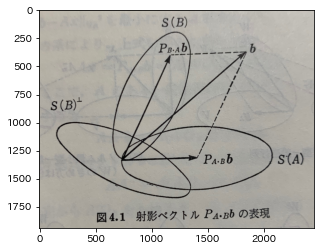

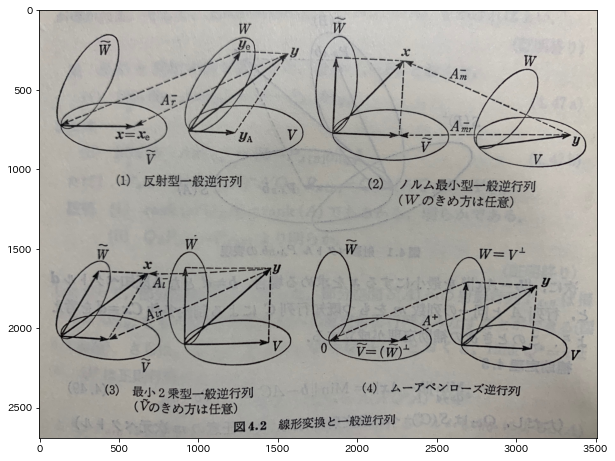

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.imshow(plt.imread('fig4_1.jpg'))
plt.show()

plt.figure(figsize=(10,8))
plt.imshow(plt.imread('fig4_2.jpg'))
plt.show()

#<center>
#    <img src="fig4_1.jpg" width="33%">
#    <img src="fig4_2.jpg" width="49%"><br/>
#</center>


In [ ]:
animals = ['おたまじゃくし', 'アオウミガメ', 'アオサギ', 'アオダイショウ', 'アカアシシギ', 
           'アカエイ', 'アカオネッタイチョウ', 'アカガエル', 'アカギツネ', 'アカゲザル', 
           'アカゲラ', 'アカシカ', 'アカテガニ', 'アカネズミ', 'アカボウクジラ', 'アカントステガ', 
           'アクロカントサウルス', 'アザラシ', 'アシカ', 'アジサシ', 'アナウサギ', 
           'アナグマ', 'アノマロカリス', 'アフリカゾウ', 'アフリカツメガエル', 'アブラツノザメ', 
           'アホウドリ', 'アマガエル', 'アマツバメ', 'アマモ', 'アミメニシキヘビ', 'アメフラシ', 
           'アメリカバイソン', 'アメリカワシミミズク', 'アメンボ', 'アメーバ', 'アユ', 
           'アライグマ', 'アリクイ', 'アリゲーターガー', 'アリジゴク', 'アルマジロ', 'アロサウルス', 
           'アロワナ', 'アンキロサウルス', 'アンコウ', 'アンテオサウルス', 'アンドリューサルクス', 
           'アンモナイト', 'アーケオプテリクス', 'アーケロン', 'アースロプレウラ', 'イエネコ', 
           'イクチオサウルス', 'イクチオステガ', 'イグアナ', 'イグアノドン', 'イサキ', 'イシガイ', 
           'イシサンゴ', 'イソギンチャク', 'イタセンパラ', 'イタチザメ', 'イッカク', 'イヌ', 
           'イヌワシ', 'イノシシ', 'イボニシ', 'イモムシ', 'イモリ', 'イリエワニ', 
           'イリオモテヤマネコ', 'イルカ', 'イロワケイルカ', 'イワシ', 'インコ', 'インドガビアル', 
           'インドクジャク', 'インドハッカ', 'ウイルス', 'ウグイ', 'ウサギ', 'ウシ', 
           'ウシガエル', 'ウズラ', 'ウツボ', 'ウナギ', 'ウバザメ', 'ウマ', 'ウミウシ', 
           'ウミガメ', 'ウミクワガタ', 'ウミサソリ', 'ウミタナゴ', 'ウミツバメ', 'ウミニナ', 
           'ウミヘビ', 'ウミユリ', 'ウンピョウ', 'エイリアン', 'エウステノプテロン', 'エゾヒグマ', 
           'エダフォサウルス', 'エチゼンクラゲ', 'エナガ', 'エピオルニス', 'エボシガイ', 'エミュー', 
           'オウムガイ', 'オオウナギ', 'オオウミガラス', 'オオカミ', 'オオコウモリ', 'オオサンショウウオ', 
           'オオセ', 'オオタカ', 'オオツノシカ', 'オオトカゲ', 'オオハシ', 'オオハシウミガラス', 'オオバン', 
           'オオフラミンゴ', 'オオマリコケムシ', 'オオメジロザメ', 'オオヤマネコ', 'オキアミ', 'オジロジカ', 
           'オジロワシ', 'オタマジャクシ', 'オットセイ', 'オナガガモ', 'オニアンコウ', 'オニオオハシ', 
           'オニヒトデ', 'オポッサム', 'オマキザル', 'オランウータン', 'オルガネラ', 'オヴィラプトロサウルス', 
           'カイウサギ', 'カイギュウ', 'カイメン', 'カエル', 'カギムシ', 'カサゴ', 'カジキ', 'カタクチイワシ', 
           'カタツムリ', 'カダヤシ', 'カッコウ', 'カツオクジラ', 'カツオドリ', 'カツオノエボシ', 'カナダガン', 
           'カニ', 'カニクイアザラシ', 'カニクイザル', 'カニダマシ', 'カバ', 'カピバラ', 'カブトガニ', 
           'カブトムシ', 'カマキリ', 'カメ', 'カメムシ', 'カモ', 'カモノハシ', 'カヤネズミ', 'カライワシ', 
           'カラシン', 'カラス', 'カルカロドントサウルス', 'カルガモ', 'カレイ', 'カワウソ', 'カワガラス', 
           'カワゲラ', 'カワスズメ', 'カワセミ', 'カワニナ', 'カワハギ', 'カワラヒワ', 'カンガルー', 
           'ガチョウ', 'キジ', 'キジバト', 'キセルガイ', 'キタキツネ', 'キタリス', 'キツツキ', 'キツネ', 
           'キツネザル', 'キバタン', 'キュウリウオ', 'キンクロハジロ', 'キンチャクダイ', 'ギガノトサウルス', 
           'ギフチョウ', 'ギンダラ', 'ギンブナ', 'クサガメ', 'クサフグ', 'クジラ', 'クニマス', 'クマ', 
           'クマネズミ', 'クマノミ', 'クモ', 'クモザル', 'クラゲ', 'クラーケン', 'クリオネ', 'クリダグナサス', 
           'クリーパー', 'クルマエビ', 'クロツヤムシ', 'クロトキ', 'クロナガアリ', 'クロマグロ', 'クワガタムシ', 
           'グッピー', 'グリプトドン', 'グリーンイグアナ', 'グンカンドリ', 'ケツァルコアトルス', 'ケンミジンコ', 
           'ケンムン', 'ケープハイラックス', 'ケープペンギン', 'ゲッチョ', 'ゲラダヒヒ', 'ゲンゴロウ', 
           'コアジサシ', 'コイ', 'コウイカ', 'コウノトリ', 'コウモリ', 'コオロギ', 'コクチョウ', 
           'コゲラ', 'コサギ', 'コジュケイ', 'コノドント', 'コビトカバ', 'コブハクチョウ', 'コモドオオトカゲ', 
           'コンゴウインコ', 'コンプソグナトゥス', 'ゴイサギ', 'ゴカイ', 'ゴキブリ', 'ゴマフアザラシ', 
           'ゴルゴサウルス', 'ゴルゴノプス', 'ゴンズイ', 'ゴンドウクジラ', 'サイチョウ', 'サカマキガイ', 
           'サケ', 'サケイ', 'サソリ', 'サメ', 'サル', 'サワガニ', 'サンゴ', 'サンショウウオ', 'ザトウクジラ', 
           'ザリガニ', 'シアノバクテリア', 'シカ', 'シカクナマコ', 'シギダチョウ', 'シクリッド', 'シジュウカラ', 
           'シノカリオプテリクス', 'シノサウロプテリクス', 'シファクティヌス', 'シマウマ', 'シマフクロウ', 
           'シャチ', 'シュモクザメ', 'ショウジョウバエ', 'シラウオ', 'シラミ', 'シロアリ', 'シロイルカ', 
           'シロウオ', 'シロサイ', 'シロナガスクジラ', 'シーサーペント', 'シーラカンス', 'ジャガーネコ', 
           'ジュゴン', 'ジリス', 'ジンベエザメ', 'スイギュウ', 'スカフォグナトゥス', 'スクミリンゴガイ', 
           'スジイルカ', 'スジエビ', 'スズガモ', 'スズメ', 'スズメガ', 'スズメダイ', 'スティラコサウルス', 
           'ステゴサウルス', 'ストロマトライト', 'スナギンチャク', 'スナネズミ', 'スナメリ', 'スネール', 
           'スピノサウルス', 'スミロドン', 'スローロリス', 'セイウチ', 'セイヨウミツバチ', 'セグロカモメ', 
           'セミクジラ', 'センザンコウ', 'ソコダラ', 'ゾウ', 'ゾウアザラシ', 'ゾウリムシ', 'タイコウチ', 
           'タガメ', 'タキタロウ', 'タコ', 'タスマニアデビル', 'タツノオトシゴ', 'タナゴ', 'タニシ', 
           'タヌキ', 'タンチョウ', 'ダイオウイカ', 'ダイサギ', 'ダチョウ', 'ダツ', 'ダマジカ', 'ダルマザメ', 
           'ダンクルオステウス', 'ダンゴムシ', 'チューブワーム', 'チョウ', 'チョウザメ', 'チョウチョウウオ', 
           'チョウチンアンコウ', 'チリモン', 'チンチラ', 'チンパンジー', 'ツェツェバエ', 'ツキノワグマ', 
           'ツチガエル', 'ツチスドリ', 'ツチノコ', 'ツチブタ', 'ツノザメ', 'ティラノサウルス', 'ティロサウルス', 
           'テッポウエビ', 'テナガエビ', 'テナガザル', 'テノントサウルス', 'テミンク', 'テンジクネズミ', 
           'テントウムシ', 'ディアデクテス', 'ディキノドン', 'ディノケファルス', 'ディモルフォドン', 
           'デイノテリウム', 'デイノニクス', 'デジモン', 'デスモスチルス', 'デルフチア・アシドボランス', 
           'トカゲ', 'トガリネズミ', 'トゲウオ', 'トビケラ', 'トビハゼ', 'トリガイ', 'トリケラトプス', 
           'トルヴォサウルス', 'トロオドン', 'ドクトカゲ', 'ドジョウ', 'ドブネズミ', 'ドロマエオサウルス', 
           'ドードー', 'ナガスクジラ', 'ナキウサギ', 'ナマケモノ', 'ナマコ', 'ナマズ', 'ナメクジ', 
           'ニゴイ', 'ニザダイ', 'ニシツノメドリ', 'ニシローランドゴリラ', 'ニジマス', 'ニタリクジラ', 
           'ニホンアカガエル', 'ニホンイシガメ', 'ニホンウナギ', 'ニホンカナヘビ', 'ニホンカワウソ', 
           'ニホンザリガニ', 'ニホンザル', 'ニホントカゲ', 'ニホンヤモリ', 'ニューギニアヤリガタリクウズムシ', 
           'ニワトリ', 'ヌタウナギ', 'ヌマエビ', 'ネコ', 'ネズッポ', 'ネズミ', 'ネズミイルカ', 'ネズミザメ', 
           'ネッシー', 'ノウサギ', 'ノコギリエイ', 'ノネズミ', 'ノーザンパイク', 'ハイイロガン', 'ハイギョ', 
           'ハエ', 'ハオリムシ', 'ハキリアリ', 'ハクジラ', 'ハクビシン', 'ハゲワシ', 'ハコフグ', 'ハシビロガモ', 
           'ハシビロコウ', 'ハジラミ', 'ハゼ', 'ハタネズミ', 'ハダカイワシ', 'ハダカデバネズミ', 'ハチ', 
           'ハチドリ', 'ハツカネズミ', 'ハト目', 'ハナムグリ', 'ハリネズミ', 'ハリモグラ', 'ハーテビースト', 
           'バイカルアザラシ', 'バクテリア', 'バッタ', 'バンドウイルカ', 'パキケトゥス', 'パキケファロサウルス', 
           'パレイアサウルス', 'ヒキガエル', 'ヒクイドリ', 'ヒグマ', 'ヒゲクジラ', 'ヒツジ', 'ヒト', 'ヒトデ', 
           'ヒドリガモ', 'ヒナモロコ', 'ヒヒ', 'ヒプシロフォドン', 'ヒヨケザル', 'ヒヨドリ', 'ヒラメ',
           'ピコプランクトン', 'ピラニア', 'ピラルクー', 'ピーシーズ', 'フェイゾン', 'フエガラス', 
           'フォルスラコス', 'フクロウ', 'フクロウオウム', 'フクロオオカミ', 'フクロネコ', 'フクロネズミ', 
           'フクロモモンガ', 'フグ', 'フジツボ', 'フデイシ', 'フルマカモメ', 'ブタ', 'ブチハイエナ', 
           'ブッポウソウ', 'ブラキオサウルス', 'プテラノドン', 'プテロダクティルス', 'プラナリア', 
           'プランクトン', 'プレシオサウルス', 'プレソドン', 'プレーリードッグ', 'プロガノケリス', 
           'プロトプラスト', 'ヘコアユ', 'ヘスペロルニス', 'ヘビ', 'ヘビクイワシ', 'ベニイロフラミンゴ', 
           'ベニザケ', 'ベンガルトラ', 'ベントス', 'ペッカリー', 'ペット', 'ペラゴルニス', 'ペリカン', 
           'ペリット', 'ペンギン', 'ホウボウ', 'ホオダレムクドリ', 'ホシハジロ', 'ホシムクドリ', 'ホタル', 
           'ホタルイカ', 'ホッキョクギツネ', 'ホッキョクグマ', 'ホホジロザメ', 'ホラアナグマ', 'ホライモリ', 
           'ホワイトバス', 'ホンソメワケベラ', 'ボノボ', 'ボラジョ', 'ポリプテルス', 'マイワシ', 'マガモ', 
           'マジュンガサウルス', 'マダイ', 'マダコ', 'マダニ', 'マッコウクジラ', 'マナヅル', 'マナティー', 
           'マハゼ', 'マプサウルス', 'マルハナバチ', 'マレーグマ', 'マンジュウダイ', 'マンモス', 
           'マーモセット', 'マーモット', 'マーレーコッド', 'ミクロラプトル', 'ミサゴ', 'ミシシッピアカミミガメ', 
           'ミジンコ', 'ミズガメ', 'ミズナギドリ', 'ミツバチ', 'ミトコンドリア', 'ミドリムシ', 
           'ミナミゾウアザラシ', 'ミミズ', 'ミミズク', 'ミュールジカ', 'ミーアキャット', 'ムカシトカゲ', 
           'ムカシトンボ', 'ムカデ', 'ムクドリ', 'ムササビ', 'ムツゴロウ', 'ムラサキウニ', 'メガテリウム', 
           'メガロドン', 'メジロザメ', 'メダカ', 'メトリオリンクス', 'メトロイド', 'メバル', 'モエビ', 
           'モクズガニ', 'モグラ', 'モササウルス', 'モツゴ', 'モノアラガイ', 'モモイロペリカン', 
           'モルモット', 'モンガラカワハギ', 'モーグリ', 'ヤギ', 'ヤシガニ', 'ヤツメウナギ', 'ヤドカリ', 
           'ヤノマミ', 'ヤブカ', 'ヤマアカガエル', 'ヤマアラシ', 'ヤマカガシ', 'ヤマシギ', 'ヤマトシジミ', 
           'ヤモリ', 'ヤンバルクイナ', 'ユスリカ', 'ユリカモメ', 'ヨコエソ', 'ヨコエビ', 'ヨコバイ', 
           'ヨシノボリ', 'ヨロイザメ', 'ヨーロッパヒメウ', 'ライチョウ', 'ラッコ', 'ランフォリンクス', 
           'リオプレウロドン', 'リャマ', 'ルリオーストラリアムシクイ', 'ルリビタキ', 'レイクトラウト', 
           'レイヨウ', 'レッサーパンダ', 'レプトケファルス', 'ロボク', 'ワシミミズク', 'ワタリガニ', 
           'ワニ', 'ワニトカゲギス', 'ワモンアザラシ', 'ワライカワセミ', 'ワラジムシ', 'ヴェロキラプトル', 
           '回虫', '始祖鳥', '山羊', '巻き貝', '巻貝', '栗鼠', '毛虫', '犬', '猫', '猿', '硬骨魚', 
           '蛇', '蛙', '蛾', '蜘蛛', '蠕虫', '豚', '象', '貝', '野ネズミ', '金魚', '鯨']

animal_P = projection(wordlist=animals)
print(animal_P(['イヌ'], Proj='Prj'))